In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ageDataset = pd.read_csv('Data/ageDatasetV3(Preprocessed).csv')
ageDataset.describe()

,Birth year,Death year,Age of death
count,760680.000000,760680.000000,760680.000000
mean,1865.328832,1935.150389,69.821557
std,107.551111,110.893258,16.429528
min,-2284.000000,-2200.000000,0.000000
25%,1846.000000,1913.000000,61.000000
50%,1894.000000,1965.000000,72.000000
75%,1922.000000,2000.000000,82.000000
max,2016.000000,2021.000000,137.000000


In [3]:
ageDataset

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death,CountryCoordinate,AssociatedModernCountry
0,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001,natural causes,49,"['(54.6, -2.0)']",['United Kingdom']
1,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865,homicide,56,"['(39.828175, -98.5795)']",['United States']
2,Q272,Paul Morand,French writer,Male,France,Artist,1888,1976,Unspecified,88,"['(47.0, 2.0)']",['France']
3,Q296,Claude Monet,French impressionist painter (1840-1926),Male,France,Artist,1840,1926,natural causes,86,"['(47.0, 2.0)']",['France']
4,Q297,Diego Velázquez,Spanish painter (1599-1660),Male,Spain,Artist,1599,1660,Unspecified,61,"['(40.2, -3.5)']",['Spain']
...,...,...,...,...,...,...,...,...,...,...,...,...
760675,Q77218559,Gustav Siber,entrepreneur from Switzerland,Male,Switzerland,Entrepreneur,1857,1924,Unspecified,67,"['(46.798562, 8.231973)']",['Switzerland']
760676,Q77247326,Marie-Fortunée Besson,Frans model (1907-1996),Unspecified,France,Tailor; model,1907,1996,Unspecified,89,"['(47.0, 2.0)']",['France']
760677,Q77249818,Diether Todenhagen,German navy officer and world war II U-boat co...,Unspecified,Germany,Military personnel,1920,1944,Unspecified,24,"['(51.0, 10.0)']",['Germany']
760678,Q77253909,Reginald Oswald Pearson,"English artist, working in stained glass, prin...",Male,United Kingdom,Artist,1887,1915,Unspecified,28,"['(54.6, -2.0)']",['United Kingdom']


In [4]:
def convert(string):
    li = list(string[1:-1].replace("'", "").split(","))
    # list(string.split("," , 1))
    return li

def convert2(string):
    li = list(string[0:-1].replace("'", "").split(";"))
    # list(string.split("," , 1))
    return li
# remove ['']
condition = ageDataset['AssociatedModernCountry'].apply(lambda x: x != "['']")
subset_df = ageDataset[condition]

# remove []
condition = subset_df['AssociatedModernCountry'].apply(lambda x: x != "[]")
subset_df = subset_df[condition]

# Get ones with list length 1 
condition = subset_df['AssociatedModernCountry'].apply(lambda x: len(convert(x)) == 1)
subset_df = subset_df[condition]

# Fill Na's with "Unspecified"
subset_df = subset_df.fillna('Unspecified')

# Remove duplicates
subset_df.drop_duplicates(subset = "Id", keep = "first", inplace = True)

# Cast to int
subset_df["Birth year"] = subset_df['Birth year'].astype(int)
subset_df["Death year"] = subset_df['Death year'].astype(int)
subset_df["Age of death"] = subset_df['Age of death'].astype(int)

subset_df


,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death,CountryCoordinate,AssociatedModernCountry
0,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001,natural causes,49,"['(54.6, -2.0)']",['United Kingdom']
1,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865,homicide,56,"['(39.828175, -98.5795)']",['United States']
2,Q272,Paul Morand,French writer,Male,France,Artist,1888,1976,Unspecified,88,"['(47.0, 2.0)']",['France']
3,Q296,Claude Monet,French impressionist painter (1840-1926),Male,France,Artist,1840,1926,natural causes,86,"['(47.0, 2.0)']",['France']
4,Q297,Diego Velázquez,Spanish painter (1599-1660),Male,Spain,Artist,1599,1660,Unspecified,61,"['(40.2, -3.5)']",['Spain']
...,...,...,...,...,...,...,...,...,...,...,...,...
760675,Q77218559,Gustav Siber,entrepreneur from Switzerland,Male,Switzerland,Entrepreneur,1857,1924,Unspecified,67,"['(46.798562, 8.231973)']",['Switzerland']
760676,Q77247326,Marie-Fortunée Besson,Frans model (1907-1996),Unspecified,France,Tailor; model,1907,1996,Unspecified,89,"['(47.0, 2.0)']",['France']
760677,Q77249818,Diether Todenhagen,German navy officer and world war II U-boat co...,Unspecified,Germany,Military personnel,1920,1944,Unspecified,24,"['(51.0, 10.0)']",['Germany']
760678,Q77253909,Reginald Oswald Pearson,"English artist, working in stained glass, prin...",Male,United Kingdom,Artist,1887,1915,Unspecified,28,"['(54.6, -2.0)']",['United Kingdom']


In [5]:
print(len(subset_df["Id"].unique()))
a, b = np.unique(subset_df["Id"].values.tolist(), return_counts = True)
results = a[b > 1]

760680


In [6]:
#subset_df.to_csv('ageDatasetV3(PreProcessed).csv', index=False)

In [7]:
print("Unique old countries: ",len(subset_df["Country"].unique()))
print("Unique modern countries: ", len(subset_df["AssociatedModernCountry"].unique()))

Unique old countries:  469
Unique modern countries:  200


In [8]:
# Finding duplicates 
subset_df["Id"].value_counts()[subset_df["Id"].value_counts() > 1].index.tolist()

[]

In [9]:
# Checking conditions
subset_df[subset_df["Id"] == "Q21604253"]

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death,CountryCoordinate,AssociatedModernCountry
669925,Q21604253,August Mercadé Ramon,Spanish economist and journalist (1909-1967),Male,Spain,Businessperson,1909,1967,Unspecified,58,"['(40.2, -3.5)']",['Spain']


In [10]:
# Order by birth year
subset_df = subset_df.sort_values(by=['Birth year'])


In [11]:
subset_df

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death,CountryCoordinate,AssociatedModernCountry
306,Q6198,Pepi II,Egyptian pharaoh of the Sixth dynasty for the ...,Male,Ancient Egypt,Statesperson,-2284,-2200,Unspecified,84,"['(29.8, 31.3)']",['Egypt']
75794,Q712524,Seth Meribre,ancient Egyptian sovereign,Male,Ancient Egypt,Sovereign,-1750,-1700,Unspecified,50,"['(29.8, 31.3)']",['Egypt']
94803,Q981363,Yi Yin,Chinese chancellor,Male,Shang dynasty,Politician,-1648,-1549,Unspecified,99,"['(36.12083333, 114.325)']",['China']
27843,Q157966,Amenhotep I,Second Pharaoh of the Eighteenth dynasty of Egypt,Male,Ancient Egypt,Statesperson,-1550,-1503,Unspecified,47,"['(29.8, 31.3)']",['Egypt']
27840,Q157899,Thutmose III,sixth Egyptian Pharaoh of the Eighteenth Dynasty,Male,Ancient Egypt,Statesperson,-1481,-1425,Unspecified,56,"['(29.8, 31.3)']",['Egypt']
...,...,...,...,...,...,...,...,...,...,...,...,...
330615,Q5047690,Caryl Rusbult,American academic,Female,Kingdom of the Netherlands,Unspecified,2010,2010,natural causes,0,"['(52.366666666, 4.883333333)']",['Netherlands']
659908,Q20900441,Alan Kurdi,three-year-old who died from capsized boat Aug...,Male,Syria,Unspecified,2012,2015,accident,3,"['(35.216667, 38.583333)']",['Syria']
744816,Q60186000,Bella Watts,American victim of murder,Unspecified,United States of America,Unspecified,2014,2018,homicide,4,"['(39.828175, -98.5795)']",['United States']
744817,Q60186041,Celeste Watts,American victim of murder,Unspecified,United States of America,Unspecified,2015,2018,homicide,3,"['(39.828175, -98.5795)']",['United States']


# Skip from here

In [ ]:
# Count different values for manner of death and occupation
subset_df["Manner of death"].value_counts()
# make occupation into a list
subset_df["Occupation"] = subset_df["Occupation"].apply(lambda x: convert(x))

# count count every different occupation 
occupation = []
for i in subset_df["Occupation"]:
    occupation.extend(i)
occupation = np.unique(occupation)
print("Number of unique occupations: ", len(occupation))
# count the appearances of every occupation
occupation_count = []
for i in occupation:
    occupation_count.append(subset_df["Occupation"].apply(lambda x: i in x).sum())
# sort the occupations by their count
occupation = np.array(occupation)
occupation_count = np.array(occupation_count)
occupation = occupation[np.argsort(occupation_count)[::-1]]
occupation_count = occupation_count[np.argsort(occupation_count)[::-1]]
# plot the occupations
plt.figure(figsize=(20,10))
plt.bar(occupation[:20], occupation_count[:20])
plt.xticks(rotation=90)
plt.title("Top 20 occupations")
plt.show()



In [ ]:
#find correlation between occupation and manner of death
occupation_manner = []
for i in occupation:
    occupation_manner.append(subset_df[subset_df["Occupation"].apply(lambda x: i in x)]["Manner of death"].value_counts())


occupation_manner_df = pd.DataFrame(occupation_manner)

In [ ]:
#drop Unspectified
occupation_manner_df = occupation_manner_df.drop("Unspecified", axis = 1)

#plot the correlation
plt.figure(figsize=(20,10))
plt.imshow(occupation_manner_df, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title("Correlation between manner of death and occupation")
plt.show()


In [ ]:
#drop unspecifed from manner of death and occupation
subset_df = subset_df[subset_df["Manner of death"] != "Unspecified"]
subset_df = subset_df[subset_df["Occupation"].apply(lambda x: "Unspecified" not in x)]
print("Number of rows: ", len(subset_df))
print("Number of unique occupations: ", len(np.unique(occupation)))
print("Number of unique manner of death: ", len(np.unique(subset_df["Manner of death"])))
#find correlation between occupation and manner of death
occupation_manner = []
for i in occupation:
    occupation_manner.append(subset_df[subset_df["Occupation"].apply(lambda x: i in x)]["Manner of death"].value_counts())

#visualize the correlation
occupation_manner_df = pd.DataFrame(occupation_manner)
#occupation_manner_df = occupation_manner_df.drop("Unspecified", axis = 1)
plt.figure(figsize=(20,10))
plt.imshow(occupation_manner_df, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title("Correlation between manner of death and occupation")
plt.show()


In [60]:
subset_df

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death,CountryCoordinate,AssociatedModernCountry
0,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,[rtis],1952,2001,natural causes,49,"['(54.6, -2.0)']",['United Kingdom']
1,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,[oliticia],1809,1865,homicide,56,"['(39.828175, -98.5795)']",['United States']
3,Q296,Claude Monet,French impressionist painter (1840-1926),Male,France,[rtis],1840,1926,natural causes,86,"['(47.0, 2.0)']",['France']
5,Q303,Elvis Presley,American singer and actor (1935–1977),Male,United States of America,[rtis],1935,1977,natural causes,42,"['(39.828175, -98.5795)']",['United States']
7,Q346,Louis IX of France,king of France,Male,France,[ule],1214,1270,natural causes,56,"['(47.0, 2.0)']",['France']
...,...,...,...,...,...,...,...,...,...,...,...,...
760380,Q75992692,Daniela Carrasco,Chilean mime died in custody in 2019,Unspecified,Chile,[rtis],1983,2019,homicide,36,"['(-33.0, -71.0)']",['Chile']
760412,Q76161186,Sara Champion,British archaeologist,Female,United Kingdom,[esearche],1946,2000,natural causes,54,"['(54.6, -2.0)']",['United Kingdom']
760518,Q76479205,Věra Kučerová,verzetstrijdster uit Tsjecho-Slowakije (1923-1...,Unspecified,Czechoslovakia,[nspecifie],1923,1942,capital punishment,19,"['(50.083333333, 14.416666666)']",['Czechia']
760612,Q76857201,Dolores Millanes,baaŋa ŋun nyɛ paɣa,Female,Spain,[rtis],1859,1906,shipwrecking,47,"['(40.2, -3.5)']",['Spain']


# Start here

In [10]:


# Count different values for manner of death and occupation
#subset_df["Manner of death"].value_counts()

#create a new dataframe with only the id, name, occupation, manner of death
#df = subset_df[["Id", "Name", "Occupation", "Manner of death"]]
df = subset_df[["Occupation", "Manner of death"]]
# split the occupation column into lists
df["Occupation"] = df["Occupation"].apply(lambda x: x.replace("'", ""))
df["Occupation"] = df["Occupation"].apply(lambda x: x.split(";"))

C:\Users\tomo9\AppData\Local\Temp\ipykernel_10784\4196236824.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Occupation"] = df["Occupation"].apply(lambda x: x.replace("'", ""))
C:\Users\tomo9\AppData\Local\Temp\ipykernel_10784\4196236824.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Occupation"] = df["Occupation"].apply(lambda x: x.split(";"))


In [11]:
# remove whitespace character from the occupation column if it starts with one
df["Occupation"] = df["Occupation"].apply(lambda x: [i[1:] if i[0] == " " else i for i in x]) 

C:\Users\tomo9\AppData\Local\Temp\ipykernel_10784\1803110956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Occupation"] = df["Occupation"].apply(lambda x: [i[1:] if i[0] == " " else i for i in x])


In [12]:
df

,Occupation,Manner of death
0,[Artist],natural causes
1,[Politician],homicide
2,[Artist],Unspecified
3,[Artist],natural causes
4,[Artist],Unspecified
...,...,...
760675,[Entrepreneur],Unspecified
760676,"[Tailor, model]",Unspecified
760677,[Military personnel],Unspecified
760678,[Artist],Unspecified


In [13]:
df['Occupation'].iloc[760676]

['Tailor', 'model']

In [14]:
# Count different values for manner of death and occupation
print(df["Manner of death"].value_counts())
#drop Unspecified from manner of death and occupation
df = df[df["Manner of death"] != "Unspecified"]
df = df[df["Occupation"].apply(lambda x: "Unspecified" not in x)]
print(df["Manner of death"].value_counts())
df = df.explode('Occupation')
df.head()
#print(df["Occupation"].value_counts())

Manner of death
Unspecified                                        718881
natural causes                                      27507
suicide                                              4324
accident                                             4248
homicide                                             3269
                                                    ...  
diabetes mellitus                                       1
dysentery                                               1
strangling                                              1
accident; 2011 Lokomotiv Yaroslavl air disaster         1
stomach cancer                                          1
Name: count, Length: 169, dtype: int64
Manner of death
natural causes                                     27237
suicide                                             4122
accident                                            4104
homicide                                            2856
capital punishment                                  1420
      

,Occupation,Manner of death
0,Artist,natural causes
1,Politician,homicide
3,Artist,natural causes
5,Artist,natural causes
7,Ruler,natural causes


In [15]:
#only keep manner of death before ; in the manner of death column
df["Manner of death"] = df["Manner of death"].apply(lambda x: x.split(";")[0])
print(df['Manner of death'].value_counts())

Manner of death
natural causes        28026
suicide                4329
accident               4280
homicide               2975
capital punishment     1614
                      ...  
era                       1
assisted suicide          1
adhesive bandage          1
Canserbero                1
White Terror              1
Name: count, Length: 108, dtype: int64


In [21]:
print(df["Occupation"].value_counts())

Occupation
Artist                  15771
Politician               6201
Athlete                  5252
Researcher               2206
Military personnel       1890
                        ...  
County court bailiff        1
ondist                      1
Notary                      1
farmworker                  1
drafter                     1
Name: count, Length: 1196, dtype: int64


In [40]:
print(df["Manner of death"].value_counts())

Manner of death
natural causes        28026
suicide                4329
accident               4280
homicide               2975
capital punishment     1614
                      ...  
era                       1
assisted suicide          1
adhesive bandage          1
Canserbero                1
White Terror              1
Name: count, Length: 108, dtype: int64


In [38]:
# Create mapping from occupation to manner of death
mapping = df.groupby('Occupation')['Manner of death'].value_counts()
mapping = mapping.unstack()
mapping = mapping.fillna(0)
mapping = mapping.astype(int)
mapping


Manner of death,2010 Thai political protests,Action T4,Atentado para uno suizo Zollinger,Avianca Flight 203,Battle of Maserfield,Bombing of Berlin in World War II,Canserbero,Category:People executed by firing squad,Eastern Front of World War II,Esophageal Cancer,...,torture,tram accident,transition,type 2 diabetes mellitus,underwater diving,unfortunate accident,unnatural death,uterine cancer,war,work accident
Occupation,,,,,,,,,,,,,,,,,,,,,
Abbé,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Abolitionist,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Academic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Accordionist,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Accountant,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
water skier,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
weather presenter,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
weightlifter,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# list the occupation and manner of death of the 20 highest correlation values
correlation = []
for i in range(len(mapping)):
    for j in range(len(mapping.columns)):
        correlation.append(mapping.iloc[i,j])
correlation = np.array(correlation)
correlation = correlation[np.argsort(correlation)[::-1]]
correlation[:20]

# list the respective occupations and manner of death

for i in range(len(mapping)):
    for j in range(len(mapping.columns)):
        if mapping.iloc[i,j] in correlation[:20]:
            print(mapping.index[i], mapping.columns[j], mapping.iloc[i,j])


Artist accident 1120
Artist homicide 495
Artist natural causes 12235
Artist suicide 1709
Athlete accident 922
Athlete natural causes 3607
Athlete suicide 470
Businessperson natural causes 480
Journalist natural causes 584
Military personnel accident 403
Military personnel capital punishment 265
Military personnel natural causes 664
Military personnel suicide 261
Politician accident 533
Politician capital punishment 430
Politician homicide 891
Politician natural causes 3688
Politician suicide 588
Religious figure natural causes 359
Researcher natural causes 1604


In [46]:
# find the person who has manner of death "adhesive bandage" and print their occupation and their name
print(subset_df[subset_df["Manner of death"] == "adhesive bandage"]["Occupation"])
print(subset_df[subset_df["Manner of death"] == "adhesive bandage"]["Name"])


76585    Military personnel
Name: Occupation, dtype: object
76585    Gertrudis Bocanegra
Name: Name, dtype: object


In [12]:
# show the line with index 76585
subset_df.iloc[76584]

Id                                                             Q717657
Name                                                      Øivind Bergh
Short description          Norwegian conductor, violinist and musician
Gender                                                            Male
Country                                                         Norway
Occupation                                                      Artist
Birth year                                                        1909
Death year                                                        1987
Manner of death                                            Unspecified
Age of death                                                        78
CountryCoordinate                                     ['(65.0, 11.0)']
AssociatedModernCountry                                     ['Norway']
Name: 76584, dtype: object

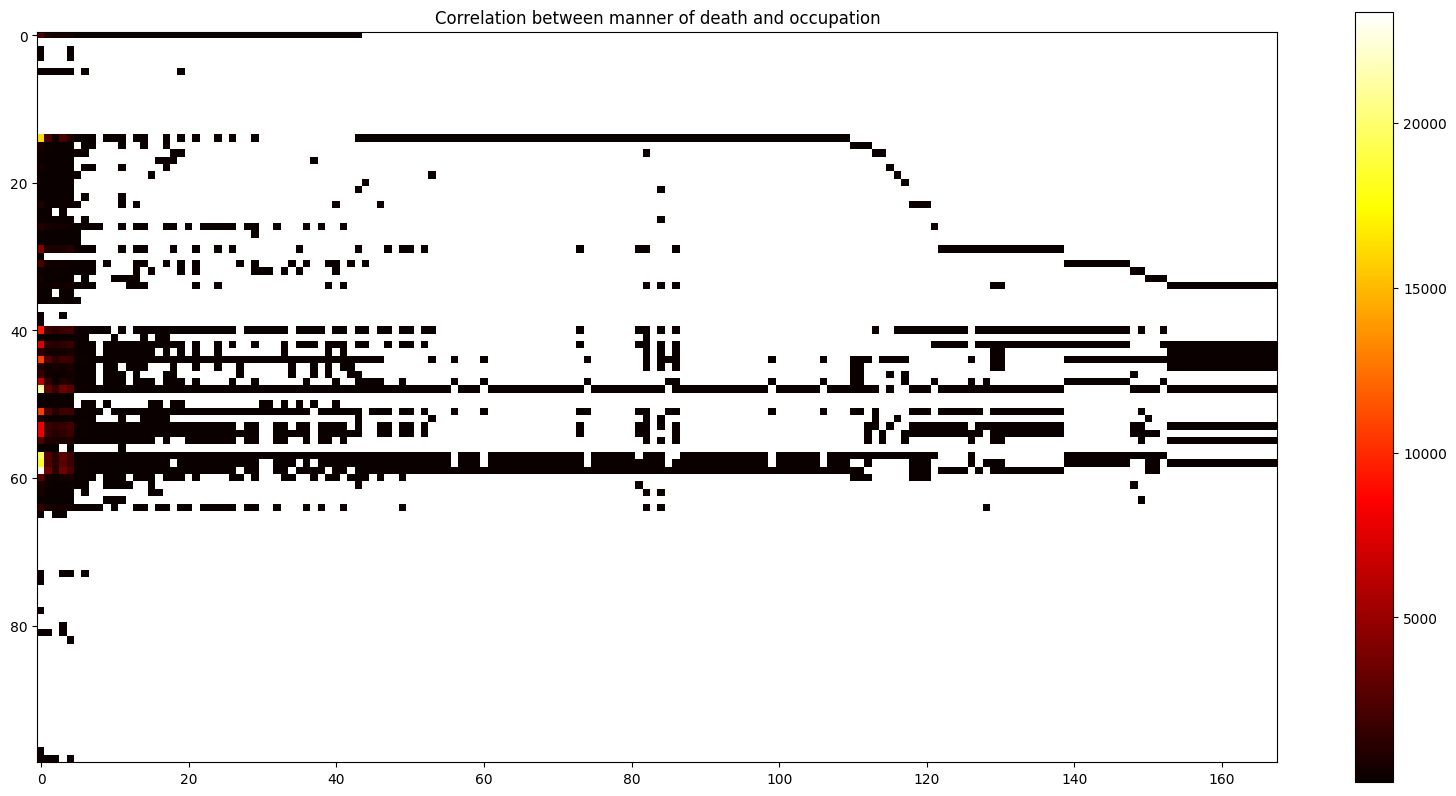

ValueError: The number of FixedLocator locations (20), usually from a call to set_ticks, does not match the number of labels (99).

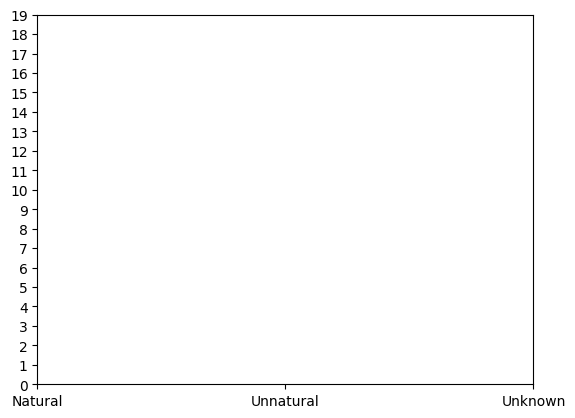

In [120]:
#find correlation between occupation and manner of death in df
occupation_manner = []
for i in occupation:
    occupation_manner.append(df[df["Occupation"].apply(lambda x: i in x)]["Manner of death"].value_counts())

#visualize the correlation and add labels
occupation_manner_df = pd.DataFrame(occupation_manner)
occupation_manner_df = occupation_manner_df.drop("Unspecified", axis = 1)
plt.figure(figsize=(20,10))
plt.imshow(occupation_manner_df, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title("Correlation between manner of death and occupation")
plt.show()
plt.xticks(np.arange(0, 3, 1), ["Natural", "Unnatural", "Unknown"])
plt.yticks(np.arange(0, 20, 1), occupation_manner_df.index)
plt.xlabel("Manner of death")
plt.ylabel("Occupation")
plt.show()


In [115]:
print(mapping)
print(df['occupation_id'])

Index(['Artist', 'Politician', 'Ruler', 'Athlete', 'Researcher', 'Official',
       'french resistance fighter', 'Sovereign', 'Playwright', 'Game designer',
       ...
       'Window cleaning', 'auditor', 'Attorney general', 'Radiographer',
       'Underwriting', 'city attorney', 'Tour operator', 'Dispatcher',
       'Intermediary', 'Nephrologist'],
      dtype='object', length=3380)
0           0
1           1
2           0
3           0
4           0
         ... 
760676    333
760676    237
760677     19
760678      0
760679      0
Name: occupation_id, Length: 772889, dtype: int64


In [11]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(subset_df['Occupation'], subset_df['Manner of death'])
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

Chi-square value: 5744517.109525747
P-value: 0.0


In [15]:
# Assuming you have calculated a correlation matrix
correlation_matrix = subset_df[['Occupation', 'Manner of death']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


ValueError: could not convert string to float: 'Artist'

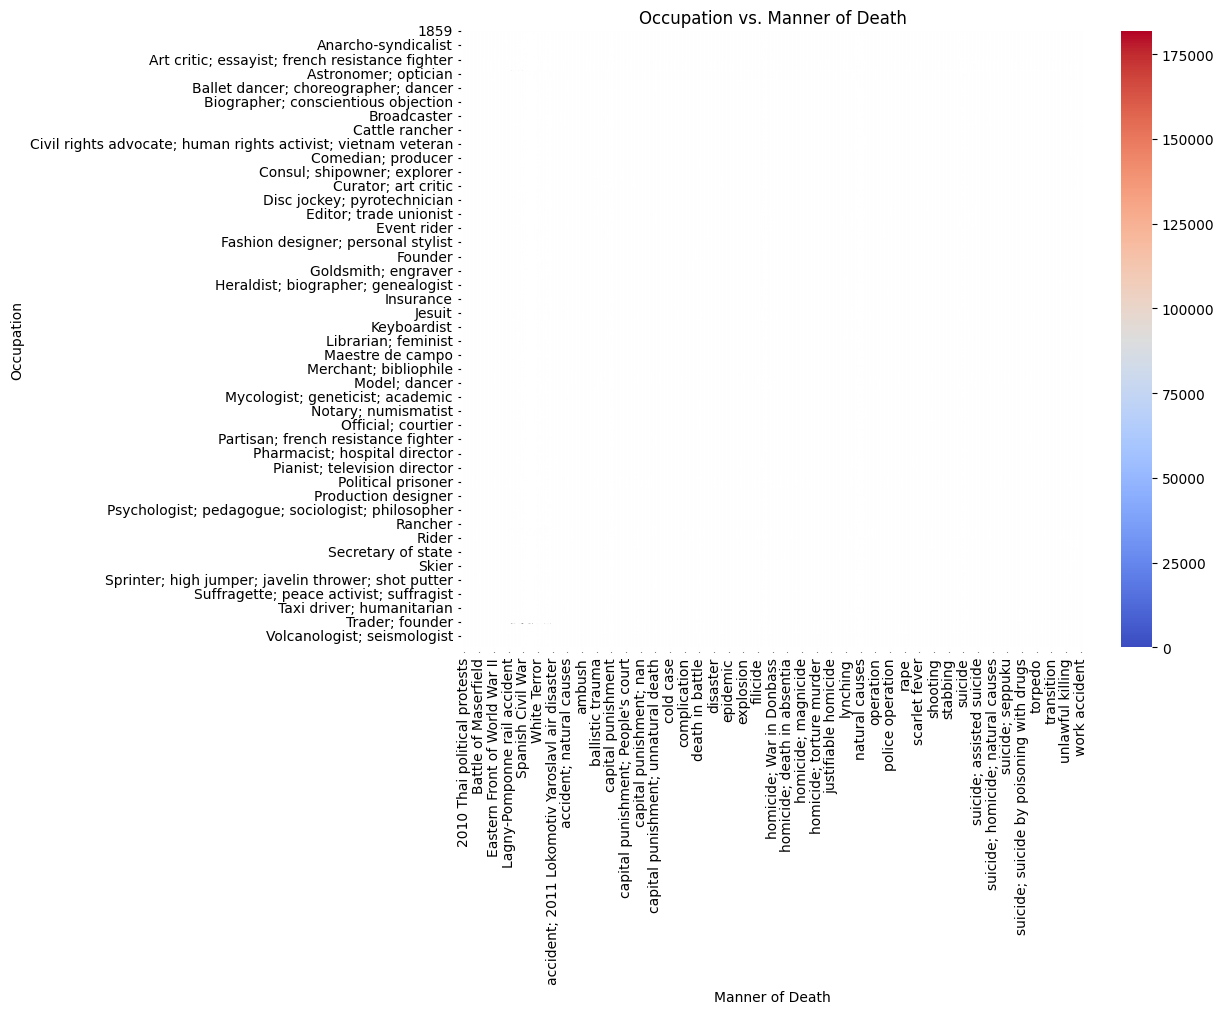

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a contingency table
#contingency_table = pd.crosstab(subset_df['Occupation'], subset_df['Manner of death'])

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Occupation vs. Manner of Death')
plt.xlabel('Manner of Death')
plt.ylabel('Occupation')
plt.show()